In [ ]:
# ****************************************************** Version 4************************************************
# Training set into train and validation set
# Fixed Balancing issues
# Additional Feature Engineering-Applied log


In [ ]:
import pandas as pd
!pip install category_encoders
#from category_encoders import TargetEncoder
import numpy as np
import seaborn as sns
#from google.colab import files
from datetime import datetime, date, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 1000)

     |████████████████████████████████| 82 kB 353 kB/s 


In [ ]:
df = pd.read_csv('Train-OOF.csv')
df_test = pd.read_csv('Test-OOF.csv')

In [ ]:
cat_features=[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

cat_features1=[x for x in df_test.columns if df_test[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in df_test.columns:
        i = df_test.columns.get_loc(col)
        df_test.iloc[:,i] = df_test.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', max_depth=None).fit(xtrain, ytrain)

In [ ]:
yhatRF = rfc.predict(xtest)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('Train set Accuracy: ', metrics.accuracy_score(ytrain, rfc.predict(xtrain)))
print('Test set Accuracy: ', metrics.accuracy_score(ytest, yhatRF))

Train set Accuracy:  0.9999102132435466
Test set Accuracy:  0.815016835016835


In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'class_weight':['balanced',None],
              'min_samples_split':[2,5,10,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='accuracy').fit(xtrain, ytrain)

In [ ]:
ypred = grid_rfc.predict(xtest)

In [ ]:
print('Train set Accuracy: ', metrics.accuracy_score(ytrain, grid_rfc.predict(xtrain)))
print('Test set Accuracy: ', metrics.accuracy_score(ytest, ypred))

Train set Accuracy:  0.9694500561167227
Test set Accuracy:  0.8185185185185185


In [ ]:
y_pred1 = grid_rfc.predict(xtrain)
y_pred1

array([0, 2, 0, ..., 0, 2, 0])

In [ ]:
print('Train set classification report: ')
print(classification_report(ytrain, y_pred1))
print('Validation test set classification report: ')
print(classification_report(ytest, ypred))

Train set classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     24251
           1       0.97      0.82      0.89      3255
           2       0.98      0.97      0.97     17044

    accuracy                           0.97     44550
   macro avg       0.97      0.93      0.95     44550
weighted avg       0.97      0.97      0.97     44550

Validation test set classification report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      8008
           1       0.61      0.34      0.44      1062
           2       0.85      0.79      0.82      5780

    accuracy                           0.82     14850
   macro avg       0.76      0.68      0.70     14850
weighted avg       0.81      0.82      0.81     14850



Train set Accuracy Score:  0.9694500561167227
Test set Accuracy Score:  0.8185185185185185


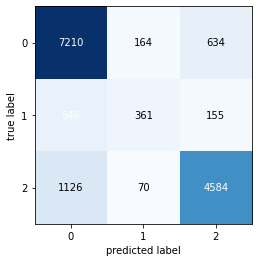

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("Train set Accuracy Score: ", accuracy_score(ytrain, y_pred1))
print("Test set Accuracy Score: ", accuracy_score(ytest, ypred))
cm = confusion_matrix(ytest, ypred.flatten())
plot_confusion_matrix(cm)
plt.show()

In [ ]:
X2 = df_test.drop(columns = ['id']).values

In [ ]:
yhat2 = grid_rfc.predict(X2)

In [ ]:
preds = pd.DataFrame(yhat2)

In [ ]:
preds.head()

In [ ]:
RFM = pd.DataFrame({'Id': df_test.id, 'status_group': yhat2})
RFM.to_csv('RFM-tuning.csv', index=False)

In [ ]:
from google.colab import files
files.download('RFM-tuning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>